# ACT REPORT: WE RATE DOGS PROJECT

## Overview

This project aims to conduct useful information about dogs. Some questions that we are interested in finding the answers are:

1. Which stage of the dogs is the most preferred?
2. Which predicted dog'breed have highest rating?
3. Which is the most common name?
4. Which breed has features that can be predicted with highest confidence?

Data is gathered from WeRateDogs Twitter.

### 1.  Which stage of the dogs is the most preferred?

Let's compare the mean of ratings in each stage

In [1]:
from IPython.core.display import display,HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
pd.set_option('display.max_colwidth', -1)

In [3]:
twitter_archive = pd.read_csv('twitter_archive_master.csv')
df = twitter_archive.groupby('rating').filter(lambda x: len(x)>10)
stage_df = df[['stage','rating']].copy()
stage_df = stage_df.dropna()
stage_df.groupby('stage').mean()

,rating
stage,
doggo,11.777778
floofer,12.000000
pupper,10.620000
puppo,12.000000


Based on the above table, *pupper* seems to be the stage that has lowest rating, on the other hand, *floofer* and *puppo* have the highest rating. However, the means do not tell you much about the nature of the data. Let's observe a violin plot.

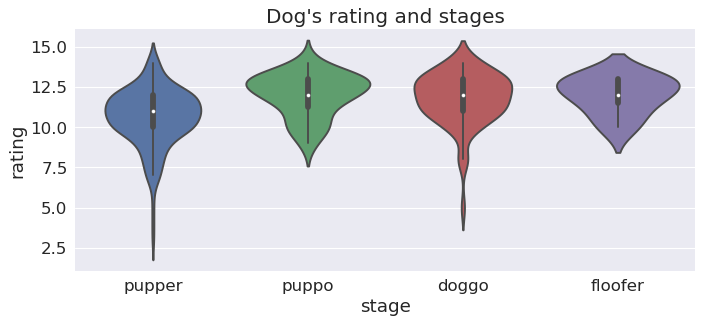

In [10]:
%matplotlib inline
fig=plt.figure(figsize=(10, 4), dpi= 80)
sns.set(font_scale=1.5)
ax = sns.violinplot(x='stage',y="rating",data=stage_df)
ax.set_title("Dog's rating and stages");

Bases on the violin plot, let's ignore *floofer* at the moment because they can be at any age. We know that, by the age, *pupper < puppo < doggo*. So 
- *puppo*, the youngest, has the lowest rating. 
- *doggo*, the elder, has highest rating but not balance. Some *doggo* have low rating.
- *puppo*, the teenager, has the highest and balanced rating.

Finally, we can decide that *puppo*, the teenager, is the stage that is most preferred by the owner.

### 2. Which predicted dog'breed have highest rating?

Let's first observe the mean rating

In [5]:
breed_df = df[['p1','p1_conf','p1_dog','rating']].copy()
breed_df = breed_df[breed_df.p1_dog==True]
breed_df.drop('p1_dog',axis=1,inplace=True)
breed_df = breed_df.groupby('p1').filter(lambda x: len(x)>=30)
breed_df.groupby('p1').mean().sort_values(by='rating').rename_axis('breed').reset_index()[['breed','rating']]

,breed,rating
0,pug,10.240741
1,chihuahua,10.615385
2,pomeranian,10.864865
3,toy_poodle,11.027778
4,labrador_retriever,11.054348
5,pembroke,11.448276
6,golden_retriever,11.602941
7,chow,11.609756
8,samoyed,11.743590


So basically, *samoyed*, *chow* and *golden_retriever* are the top three. Let's observe a violin plot to see if there's something new.

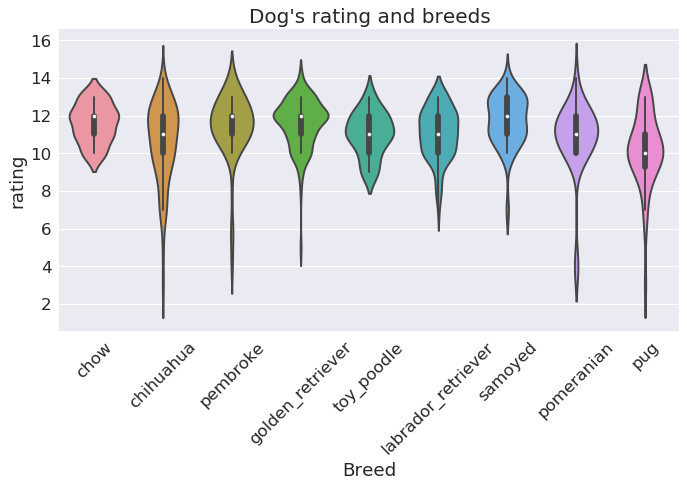

In [6]:
fig=plt.figure(figsize=(10, 5), dpi= 80)
sns.set(font_scale=1.5)
ax = sns.violinplot(x='p1',y="rating",data=breed_df)
ax.set_title("Dog's rating and breeds")
ax.set_xlabel("Breed")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

So based on the plot we see that, even though *samoyed*, *chow* and *golden_retriever* are the top three.But *samoyed* and *golden_retriever*'s rating are not balanced. So in this question, we choose *chow*, the most preferable dog breed because of its high mean rating and also balance rating.

### 3. Which is the most common name?

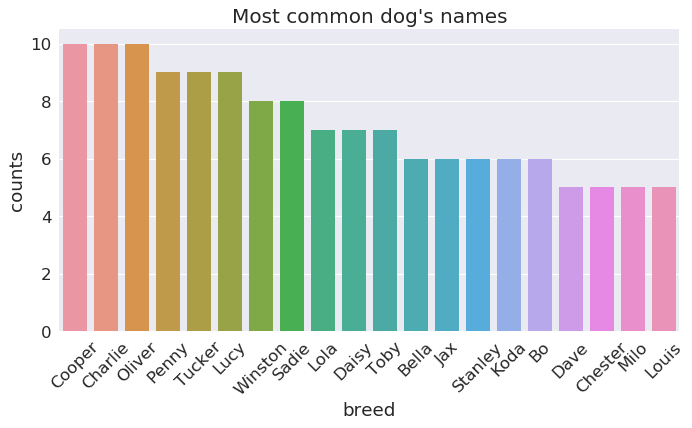

In [7]:
name_df = df.name.value_counts()[:20].rename_axis('breed').reset_index(name='counts')
fig=plt.figure(figsize=(10, 5), dpi= 80)
ax = sns.barplot(x='breed',y='counts',data=name_df)
ax.set_title("Most common dog's names")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

So Cooper, Oliver and Charlie are the most common dog's names.

### 4. Which breed has features that can be predicted with highest confidence?

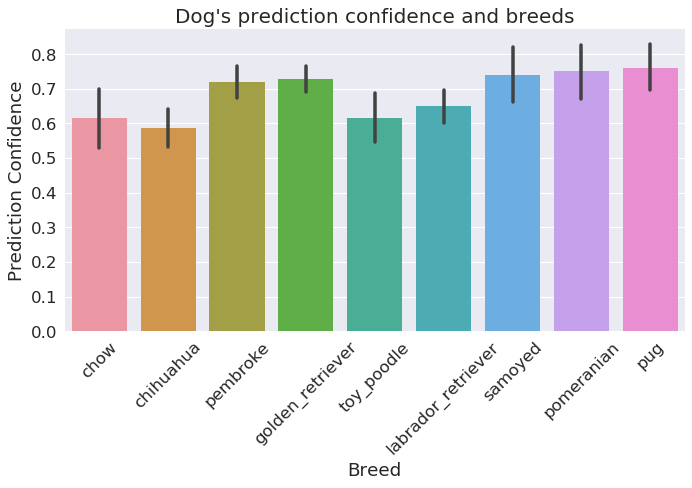

In [8]:
fig=plt.figure(figsize=(10, 5), dpi= 80)
sns.set(font_scale=1.5)
ax = sns.barplot(x='p1',y="p1_conf",data=breed_df)
ax.set_title("Dog's prediction confidence and breeds")
ax.set_xlabel("Breed")
ax.set_ylabel("Prediction Confidence")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

So basically, the breeds pug, pomeranian are top two that have highest confidences in prediction. Let's look at the mean

In [9]:
breed_df.groupby('p1')['p1_conf'].mean().sort_values(ascending=False).rename_axis('breed').reset_index(name='mean')

,breed,mean
0,pug,0.759223
1,pomeranian,0.751073
2,samoyed,0.740719
3,golden_retriever,0.727063
4,pembroke,0.721198
5,labrador_retriever,0.649661
6,toy_poodle,0.616089
7,chow,0.615648
8,chihuahua,0.587447


So Top 1 is *pug* with the mean 0.759 and the second is *pomeranian* with the mean is 0.751. But does it really *pug* have higher prediction confidence than *pomeranian*? We will do statistical hypothesis testing with 95% confidence as follows:
Let's call $\mu_1$ and $\mu_2$ are repectively the mean of prediction confidence of *pub* and *pomeranian*. Set the following hypotheses:

<center> $H_0: \mu_1 = \mu_2$</center>

<center> $H_1: \mu_1 > \mu_2$</center>

The `p-value = 0.88` which is really big so there is no significance evidence to say that *pug* has higher prediction confidence than *pomeranian*. So they are both taking the first rank.

## Conclusion

Based on the analysis, we conclude:

-  *puppo*, the teenager, is the stage that is most preferred by the owner.
- *chow*, the most preferable dog breed
- Cooper, Oliver and Charlie are the most common dog's names.
- *pub* and *pomeranian* are both taking the first rank with highest prediction confidence.